In [1]:
import os
import pickle

import matplotlib.pyplot as plt

import lib_data_process as dapr
import lib_plot


In [2]:
azimut_mask = [280,320]
elevation_mask = [8,30]
min_height = 2
max_height = 4
t_range = 30

In [3]:
main_path_1 = os.path.abspath('../data/20230217/1/')
main_path_2 = os.path.abspath('../data/20230217/2/')
main_path_r = os.path.abspath('../data/20230217/2_rotate/')

ts_0217_1 = dapr.generate_timeseries(main_path_1, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L1')
ts_0217_2 = dapr.generate_timeseries(main_path_2, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L1')
ts_0217_r = dapr.generate_timeseries(main_path_r, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L1')

100%|██████████| 29/29 [02:25<00:00,  5.01s/it]


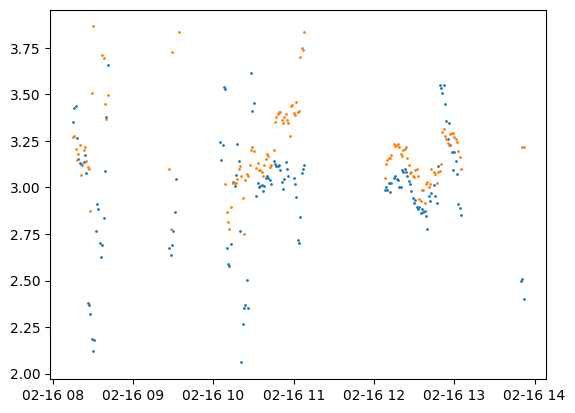

In [4]:
fig,ax = plt.subplots()
ax.scatter(list(ts_0217_1.keys()), list(ts_0217_1.values()), s=1)
ax.scatter(list(ts_0217_2.keys()), list(ts_0217_2.values()), s=1)
#ax.scatter(list(ts_0217_r.keys()), list(ts_0217_r.values()), s=1)

In [9]:
main_path_1 = os.path.abspath('../data/20230217/1/')
main_path_2 = os.path.abspath('../data/20230217/2/')
main_path_r = os.path.abspath('../data/20230217/2_rotate/')

ts_0217_1 = dapr.generate_timeseries(main_path_1, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L2')
ts_0217_2 = dapr.generate_timeseries(main_path_2, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L2')
# ts_0217_r = dapr.generate_timeseries(main_path_r, azimut_mask, elevation_mask, min_height, max_height, t_range, 2023, 2, 16,'L2')

100%|██████████| 29/29 [08:40<00:00, 17.95s/it]


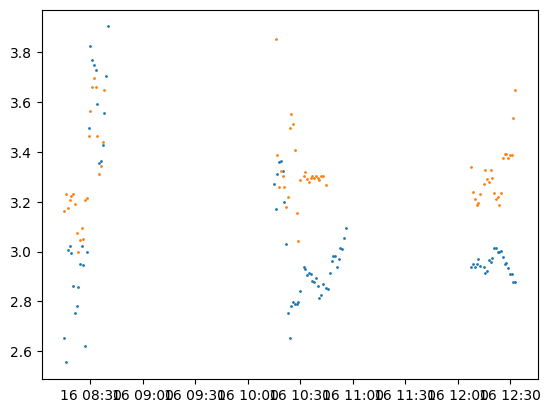

In [10]:
fig,ax = plt.subplots()
ax.scatter(list(ts_0217_1.keys()), list(ts_0217_1.values()), s=1)
ax.scatter(list(ts_0217_2.keys()), list(ts_0217_2.values()), s=1)
#ax.scatter(list(ts_0217_r.keys()), list(ts_0217_r.values()), s=1)